#### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Leitura dos dados

In [2]:
df = pd.read_csv('./datasets/dataset.csv', sep = ';')
df.head(15)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
5,1449993,143,5.119767,0.043398
6,464000,107,7.846771,0.157954
7,1050000,87,0.190406,0.555212
8,1580000,155,2.241815,0.001266
9,4200000,348,0.105480,0.854900


In [3]:
df.shape

(5000, 4)

#### Análise descritivas

In [4]:
df.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


#### Matriz de correlação

In [5]:
df.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


In [6]:
palette = ['#fd5f00']
sns.set_palette(sns.color_palette(palette))
sns.set_style('darkgrid')

#### Visualização da variável depedente (Y)

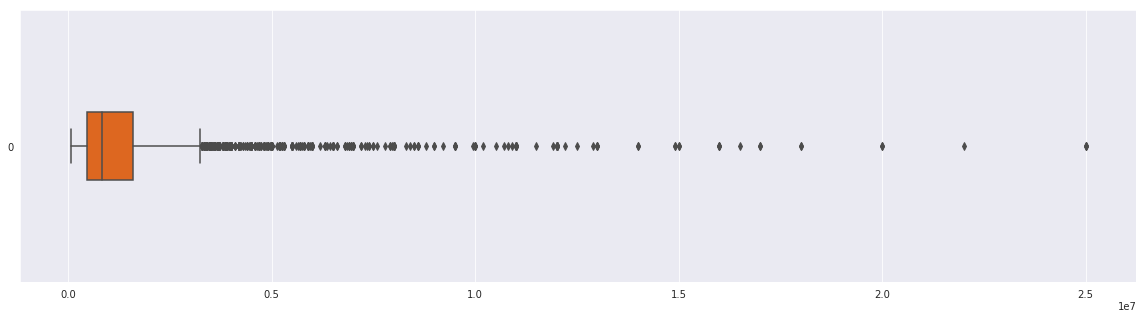

In [7]:
ax = sns.boxplot(data=df['Valor'], orient='h', width=0.25)
ax.figure.set_size_inches(20,5)

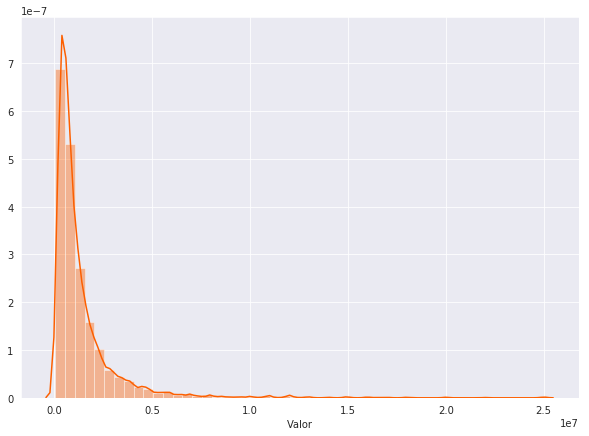

In [8]:
ax = sns.distplot(df['Valor'])
ax.figure.set_size_inches(10,7)

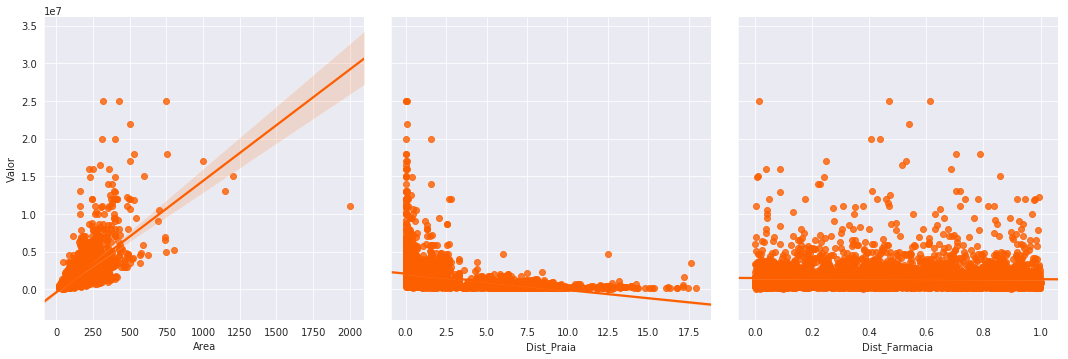

In [9]:
sns.pairplot(df, y_vars='Valor', x_vars=['Area','Dist_Praia','Dist_Farmacia'], height=5, kind='reg')

#### Transformação de dados (Logarítmica)

In [10]:
df['log_Valor'] = np.log(df['Valor'])
df['log_Area'] = np.log(df['Area'])
df['log_Dist_Praia'] = np.log(df['Dist_Praia'] + 1)
df['log_Dist_Farmacia'] = np.log(df['Dist_Farmacia'] + 1)

In [11]:
df.head(15)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946
5,1449993,143,5.119767,0.043398,14.187069,4.962845,1.811524,0.042483
6,464000,107,7.846771,0.157954,13.047640,4.672829,2.180053,0.146655
7,1050000,87,0.190406,0.555212,13.864301,4.465908,0.174295,0.441612
8,1580000,155,2.241815,0.001266,14.272935,5.043425,1.176133,0.001265
9,4200000,348,0.105480,0.854900,15.250595,5.852202,0.100280,0.617831


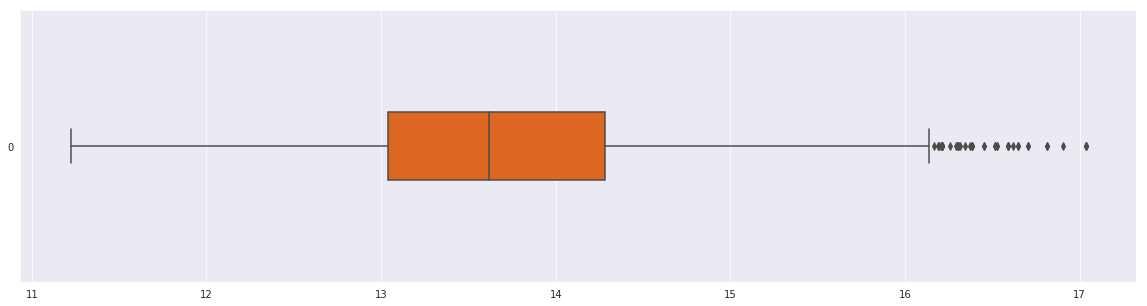

In [12]:
ax = sns.boxplot(data=df['log_Valor'], orient='h', width=0.25)
ax.figure.set_size_inches(20,5)

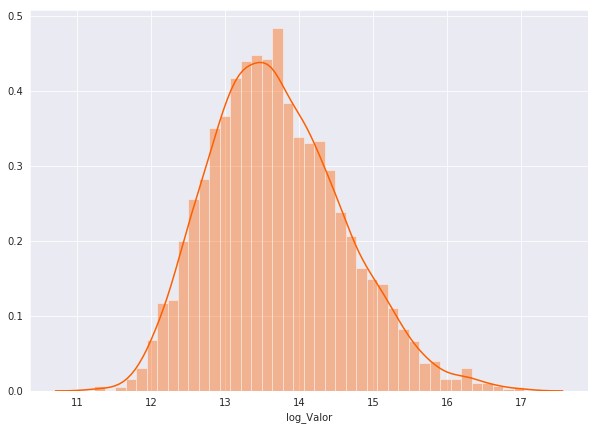

In [13]:
ax = sns.distplot(df['log_Valor'])
ax.figure.set_size_inches(10,7)

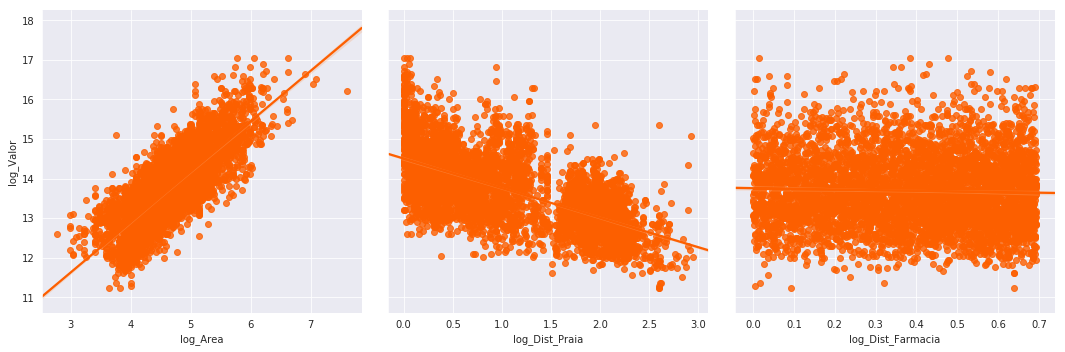

In [14]:
sns.pairplot(df, y_vars='log_Valor', x_vars=['log_Area','log_Dist_Praia','log_Dist_Farmacia'], height=5, kind='reg')

#### Testando e treinando dados

<p style='font-size: 15px; line-height: 2; margin: 1px 1px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>

In [15]:
y = df['log_Valor']
X = df[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

#### Adicionando constante 

In [17]:
X_train_const = sm.add_constant(X_train)

/home/sid/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
X_train_const.head(15)

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
4561,1.0,5.438079,1.182793,0.628547
4229,1.0,4.127134,1.632077,0.176840
718,1.0,4.219508,1.838462,0.174500
3895,1.0,4.158883,0.536594,0.346678
4726,1.0,4.330733,2.164887,0.348602


#### Estimando modelo

In [19]:
modelo_statsmodel = sm.OLS(y_train, X_train_const, hasconst = True).fit()

In [20]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:43:45   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

#### Ajustando modelo

In [21]:
X = df[['log_Area','log_Dist_Praia']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [23]:
X_train_const = sm.add_constant(X_train)
X_train_const.head(15)

,const,log_Area,log_Dist_Praia
2661,1.0,5.945421,0.000000
912,1.0,3.135494,0.972865
3042,1.0,4.317488,1.794961
141,1.0,3.401197,0.310455
3854,1.0,5.676754,0.032193
4561,1.0,5.438079,1.182793
4229,1.0,4.127134,1.632077
718,1.0,4.219508,1.838462
3895,1.0,4.158883,0.536594
4726,1.0,4.330733,2.164887


In [24]:
modelo_statsmodel = sm.OLS(y_train, X_train_const, hasconst = True).fit()
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:43:45   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

#### Estimando modelo com os dados de treino

In [25]:
modelo = LinearRegression()

In [26]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Coeficiente de determinação

In [27]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


In [28]:
y_predict = modelo.predict(X_test)

In [29]:
print('R² = %s' % metrics.r2_score(y_test, y_predict).round(3))

R² = 0.79


#### Previções pontuais

In [30]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [31]:
modelo.predict(entrada)[0].round(3)

14.285

In [32]:
np.exp(modelo.predict(entrada))[0].round(3)

1598889.785

In [33]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]
print('R$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  2777292.840312


#### Interpretação dos Coeficientes Estimados

<p style='font-size: 15px; line-height: 2; margin: 1px 1px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [34]:
modelo.intercept_

9.334916409800323

In [35]:
np.exp(modelo.intercept_)

11326.681428069782

<p style='font-size: 15px; line-height: 2; margin: 1px 1x; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 15px; line-height: 2; margin: 1px 1x; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [36]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [37]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [38]:
index = ['Intercepto','log - Área','log - Distancia até a praia (km)']
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parametros'] )

,Parametros
Intercepto,9.334916
log - Área,1.058078
log - Distancia até a praia (km),-0.490612


<p style='font-size: 14px; line-height: 3; margin: 1px 1px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 14px; line-height: 3; margin: 1px 1px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 14px; line-height: 3; margin: 1px 1px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

#### Análises gráficas

In [39]:
y_predict_train = modelo.predict(X_train)

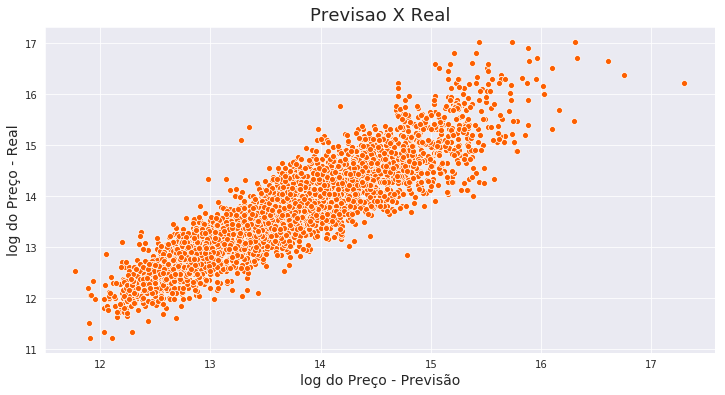

In [40]:
ax = sns.scatterplot(x=y_predict_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

#### Residuos

In [41]:
residuo = y_train - y_predict_train

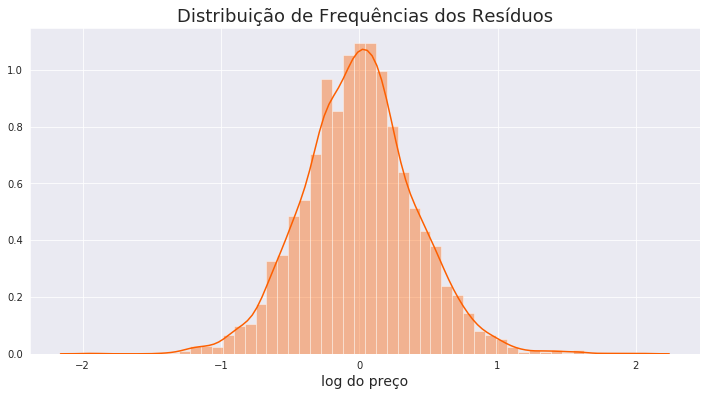

In [42]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax